### Numerical Example: An application to complementary dynamical systems
#### Author: Maximiliano Lioi @ University of Chile

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm  
from matplotlib.animation import FuncAnimation
from scipy.integrate import quad

### Catching-Up Algorithm with Approximate Projections
In this section, we propose a numerical method for the existence of solutions for the sweeping process:

\begin{equation}
\begin{aligned}
\dot{x}(t) &\in -N(C(t) ; x(t))+F(t, x(t)) \quad \textrm{ a.e. } t \in[0, T], \\
x(0) & =  x_0 \in C(0),
\end{aligned}
\end{equation}

where $C:[0, T] \rightrightarrows \mathcal{H}$ is a set-valued map with closed values in a Hilbert space $\mathcal{H}$, $N(C(t) ; x)$ stands for the Clarke normal cone to $C(t)$ at $x$, and $F:[0, T] \times \mathcal{H} \rightrightarrows \mathcal{H}$ is a given set-valued map with nonempty closed and convex values. Our algorithm is based on the catching-up algorithm, except that we do not ask for an exact calculation of the projections.

The proposed algorithm is given as follows. For $n \in \mathbb{N}^*$, let $\left(t_k^n: k=0,1, \ldots, n\right)$ be a uniform partition of $[0, T]$ with uniform time step $\mu_n:=T / n$. Let $\left(\varepsilon_n, \eta_n\right)$ be a sequence of positive numbers such that $\varepsilon_n / \mu_n^2 \rightarrow 0$ and $\eta_n/\mu_n \to 0$. We consider a sequence of piecewise continuous linear approximations $\left(x_n\right)$ defined as $x_n(0)=x_0$ and for any $k \in\{0, \ldots, n-1\}$ and $t \in ] t_k^n, t_{k+1}^n ]$
\begin{equation}
x_n(t)=x_k^n+\frac{t-t_k^n}{\mu_n}\left(x_{k+1}^n-x_k^n-\int_{t_k^n}^{t_{k+1}^n} f\left(s, x_k^n\right) ds\right)+\int_{t_k^n}^t f\left(s, x_k^n\right) \mathrm{d} s,
\end{equation}
where $x_0^n=x_0$ and
\begin{equation}
x_{k+1}^n \in \operatorname{proj}_{C\left(t_{k+1}^n\right)}^{\varepsilon_n, \eta_n}\left(x_k^n+\int_{t_k^n}^{t_{k+1}^n} f\left(s, x_k^n\right) ds\right) \text { for } k \in\{0,1, \ldots, n-1\} .
\end{equation}

Here $f(t, x)$ denotes any selection of $F(t, x)$ such that $f(\cdot, x)$ is measurable for all $x \in \mathcal{H}$. For simplicity, we consider $f(t, x) \in \operatorname{proj}_{F(t, x)}^\gamma(0)$ for some $\gamma>0$.

The above algorithm is called catching-up algorithm with approximate projections because the projection is not necessarily exactly calculated. We will prove that the above algorithm converges for several families of algorithms as long the inclusion is verified.

### Complementary Dynamical System and Sweeping Procesess
Let us consider the following linear complementary dynamical system
\begin{equation}
\begin{cases}
    \dot{x}(t) = Ax(t) + B \zeta(t) + E u(t) \\
    0 \leq \zeta(t) \perp w(t) = Cx(t) + D\zeta(t) + Gu(t) + F \geq 0,
\end{cases}
\end{equation}
where the matrices and vectors $A,B,C,D,E,F,G$ are constant of suitable dimensions, $x(t) \in \mathbb{R}^{n}$, $u(t) \in \mathbb{R}^{p}$, $\zeta(t) \in \mathbb{R}^{m}$ as it is studied in Brogliato. For the case of D = 0, just as in Thibault's paper, assuming that there exists a symmetric positive definite matrix $P$ such that
\begin{equation}
    PB = C^T
\end{equation}
it is proven in Brogliato that, by defining $R$ as $R^{2} = P$, the symmetric positive definite square root of $P$ and letting $z(t) = Rx(t)$, the complementary dynamical system can be modeled as the following perturbed sweeping process
\begin{equation}
\dot{z}(t) \in -N(S(t);z(t)) + RAR^{-1}z(t) + REu(t)
\end{equation}
where  $S(t) := R(K(t)) = \{Rx \ | \ x \in K(t)\}$ and $K(t)$ is the closed convex polyhedral set defined for each $t \in [0, +\infty[$ as
$$K(t):= \{x \in \mathbb{R}^{n} \ | \ Cx + Gu(t) + F \geq 0\}$$

* In order to solve this perturbed sweeping process using the Catching-Up Algorithm, we must find a way to obtain approximate projections over $RK(t)$

### Solving the projection problem using duality
Let´s consider the projection over the polytope $R K(t)$ given by
\begin{equation}
\begin{aligned}
\min_{z \in \mathbb{R}^{n}} & \Vert x - y \Vert^{2}\\
\textrm{s.t.} & \ y \in S(t)
\end{aligned}
\end{equation}
Equivalently
\begin{equation}
\begin{aligned}
\min_{z \in \mathbb{R}^{n}} & \Vert x - Rz \Vert^{2}\\
\textrm{s.t.} & \ Cx + Gu(t) + F \geq 0
\end{aligned}
\end{equation}

In order to solve the primal problem, it can be written as the following strictly quadratic problem with linear constraints, 
\begin{equation}
\begin{aligned}
\min_{z \in \mathbb{R}^{n}} & z^T Q z + 2 f^T z\\
\textrm{s.t.} & \ Ax \leq b
\end{aligned}
\end{equation}
where $Q = P$, $f = -Rx$, $A = -C$ and $b = Gu(t) + F$, therefore we will proceed as in \cite[Example 12.3.2]{doi:10.1137/1.9781611973655} by solving his dual problem which is also a strictly convex quadratic problem of the form
\begin{equation}
\begin{aligned}
\max_{\lambda \in \mathbb{R}^{m}} & -\lambda^T A Q^{-1} A^T \lambda -2(AQ^{-1}f + b)^T \lambda -f^{T} Q^{-1}f\ \\
\textrm{s.t.} & \quad \lambda \geq 0
\end{aligned}
\end{equation}
along with the following optimality condition
\begin{equation}
z^{*} = -Q^{-1}(f + A^T \lambda^{*})
\end{equation}
its advantage over the primal problem is that its feasible set is simpler, in fact, we can develop a method for solving the primal problem based on orthogonal projection method applied to the dual problem. In our case, the dual problem omitting constants and writing it as a minimization problem is
\begin{equation}
\begin{aligned}
\min_{\lambda \in \mathbb{R}^{m}} & \lambda^T (C P^{-1} C^{T}) \lambda + 2(-CP^{-1}(-Rx) + Gu(t) + F)^{T}\lambda\\
\textrm{s.t.} & \quad \lambda \geq 0
\end{aligned}
\end{equation}
We recall that $PB = C^T$ and that $R$ is the symmetric positive definite square root of $P$, then the dual problem can be rewritten as
\begin{equation}
\begin{aligned}
\min_{\lambda \in \mathbb{R}^{m}} & \lambda^T CB \lambda + 2(B^T Rx + Gu(t) + F)^{T}\lambda\\
\textrm{s.t.} & \quad \lambda \geq 0
\end{aligned}
\end{equation}


### Solution via Orthogonal Gradient Projection over a polytope
Assuming that $S(t)$ is nonempty, strong duality holds, denoting  $q(\lambda)$ the objective funcion of the dual problem, his gradient is given by
$$\nabla q (\lambda) = 2CB \lambda + 2(B^TRx + Gu(t) + F)$$
then using a constant stepsize with the orthogonal projection method, which can be chosen as $\frac{1}{L}$, where $L$ is the Lipschitz constant of the gradient of the objective function given by $L = 2 \lambda_{\max}(CB)$. 

Using the fact that $\operatorname{proj}_{\mathbb{R}_{+}^{m}}(x) = [x]_{+}$, the positive part of $x$, the general step of the method would be
\begin{equation}
\lambda_{k+1} = \left[ \lambda_k - \frac{2}{L}\left(CB \lambda_k + B^{T}Rx + Gu(t) + F\right)\right]_{+}
\end{equation}
Given $z^{*}$ and ${\lambda^{*}}$ the solutions of the primal and dual problem respectively and $\{\lambda_k\}$ the sequence generated by the orthogonal projection method, according to KKT, the optimality condition is given by
\begin{equation}
    z^{*} = - P^{-1}(-Rx - C^{T}\lambda^{*}) = B \lambda^{*} + R^{-1} x
\end{equation}
by defining for each $k \in \mathbb{N}$, $z_k = B \lambda_k + R^{-1} x$, we obtain the following bound in terms of $\{\lambda_k\}$ respect to the primal problem
\begin{equation}
\Vert z_k - z^{*} \Vert \leq \Vert B \Vert \Vert \lambda_k - \lambda^{*} \Vert
\end{equation}

### Function $ \operatorname{proj}_{\mathbb{R}^{m}_{+}}(x) =  [x]_{+} $

$$[x]_{+} = (x_i)_{i = 1}^{n} = \begin{cases} x_i \quad \text{if} \quad x_i > 0 \text{ for } i \in \{1, \cdots, n\} \\ 0 \quad \text{if} \quad x_i \leq 0 \text{ for } i \in \{1, \cdots, n\} \end{cases}$$

In [9]:
# Function [x]_{+} 
def positive_part(x):
    """ 
    **Computes the positive part of the input array x.**
    
    Parameters:
    - x (array): Input array n-dimensional.

    Returns:
    - array: Output array with positive parts of array x. 
    """
    return np.maximum(0, x)

### Dual Projected Gradient Method Step
\begin{equation}
\lambda_{k+1} = \left[ \lambda_k - \frac{2}{L}\left(CB \lambda_k + B^{T}Rx + Gu(t) + F\right)\right]_{+}
\end{equation}

In [11]:
def dual_proj_gradient_step(lambda_k, x, B, C, R, G, F, L, u_t):
    """ 
    Performs a projected gradient step on the dual problem using the orthogonal projection method.

    This method solves the dual problem via Orthogonal Gradient Projection over a polytope, applying the projection onto 
    the non-negative orthant (positive part). The gradient of the dual objective function is given by:
    ∇q(λ) = 2CBλ + 2(B^T Rx + Gu(t) + F), and a constant stepsize of 1/L is used, where L is the Lipschitz constant.

    Parameters:
    - lambda_k (array): Current step in the dual problem (dual variables).
    - x (array): Current primal variables or state vector.
    - B (matrix): Matrix involved in the linear transformation of dual variables.
    - C (matrix): Another matrix involved in the linear transformation.
    - R (matrix): Matrix related to the constraints or cost function.
    - G (matrix): Matrix related to the input control term in the gradient expression.
    - F (array): Constant term in the gradient expression.
    - L (float): Lipschitz constant for the gradient step, given by L = 2 * λ_max(CB).
    - u_t (array): Input vector or control function at time t.

    Returns:
    - lambda_{k+1} (array): Next step in the dual projected gradient method, projected onto the non-negative orthant.
    """
    gradient = 2 * (C @ B @ lambda_k + B.T @ (R @ x) + (G * u_t) + F)
    return positive_part(lambda_k - (1 / L) * gradient)

### Conditions to satisfy in order to find elements in $y = \operatorname{proj}_{S(t)}(x)$

In order to apply the catching up algorithm with approximate projections to solve this perturbed sweeping process, we must be able to find a way to compute elements $y \in \operatorname{proj}_{S(t)}^{\varepsilon, \eta}(x)$, for any $x \in \mathbb{R}^{n}$, given $\varepsilon, \eta > 0$ and $S(t)$ as describe before, then $y$ must satisfy the following two conditions
\begin{equation}
\begin{cases}
\Vert x-y \Vert^{2} \leq d_{S(t)}(x)^{2} + \varepsilon\\
d_{S(t)}(y) \leq \eta
\end{cases}
\end{equation}

To obtain $y \in \operatorname{proj}_{S(t)}^{\varepsilon, \eta}(x)$, with $y = Rz_k$ such that it satisfy this last conditions, we need $k \in \mathbb{N}$ such that,
\begin{equation}
(1) \quad g(z_k) - g(z^{*}) \leq \left(\Vert P \Vert \Vert B(\lambda_k + \lambda^{*})+2R^{-1}x\Vert + 2\Vert Rx\Vert\right)\Vert \Vert B \Vert \Vert \lambda_{k} - \lambda^{*}\Vert \leq \varepsilon
\end{equation}
and 
\begin{equation}
(2) \quad \Vert z_k - z^{*} \Vert \leq \Vert B \Vert \Vert \Vert \lambda_{k} - \lambda^{*}\Vert \leq \frac{\eta}{\Vert R \Vert}  
\end{equation}

We are going to approximate $\lambda_{k} - \lambda^{*}$ with $\lambda_{k} - \lambda_{k+1}$ for the numerical results, the exit condition of the gradient projected step will be given by
$$\left(\Vert P \Vert \Vert B (\lambda_k + \lambda_{k+1})+2R^{-1}x\Vert + 2\Vert Rx\Vert\right)\Vert \Vert B \Vert \Vert \lambda_{k} - \lambda_{k+1}\Vert \leq \varepsilon$$
and
$$\Vert B \Vert \Vert \Vert \lambda_{k} - \lambda_{k+1}\Vert \leq \frac{\eta}{\Vert R \Vert} $$

Let´s denote $\alpha_k = \left(\Vert P \Vert \Vert B(\lambda_k + \lambda_{k+1})+2R^{-1}x\Vert + 2\Vert Rx\Vert\right) \Vert B \Vert$

### Solver for the dual problem with $\epsilon_n - \eta_n$ tolerance: @solver_dual_problem_eps_eta

\begin{equation}
\begin{aligned}
\min_{\lambda \in \mathbb{R}^{m}} & \lambda^T CB \lambda + 2(B^T Rx + Gu(t) + F)^{T}\lambda\\
\textrm{s.t.} & \quad \lambda \geq 0
\end{aligned}
\end{equation}

In [18]:
def solver_dual_problem_eps_eta(x, B, C, R, G, F, P, L, u_t, eps, eta):
    """ 
    Solves the dual problem using the Projected Gradient Method with epsilon-eta approximate projections.

    This method applies the catching-up algorithm with approximate projections to solve a perturbed sweeping process.
    It aims to find an element y ∈ proj_{S(t)}^{ε,η}(x), satisfying two conditions based on ε and η:
    
    1. ||x - y||² ≤ d_{S(t)}(x)² + ε
    2. d_{S(t)}(y) ≤ η

    The solution iterates through the projected gradient steps to ensure that the conditions for ε and η are met.

    Parameters:
    - x (array): Input primal variable or state vector in R^n.
    - B (matrix): Matrix involved in the linear transformation of dual variables.
    - C (matrix): Matrix involved in the gradient calculation.
    - R (matrix): Matrix related to constraints or the cost function.
    - G (matrix): Matrix related to the input control term.
    - F (array): Constant vector involved in the gradient.
    - P (matrix): Matrix used in the calculation of alpha_k for convergence criteria.
    - L (float): Lipschitz constant of the gradient, related to the step size.
    - u_t (array): Input vector or control function at time t.
    - eps (function): Function controlling the precision of the convergence with respect to ε.
    - eta (function): Function controlling the precision of the convergence with respect to η.

    Returns:
    - lambda_k (array): Approximate solution of the dual problem at convergence.
    """
    # Initial iteration for Projected Gradient over the dual problem
    lambda_k = np.array([0.0, 0.0]) # Initial guess \lambda_0 to perform optimization
    lambda_k_plus = dual_proj_gradient_step(lambda_k, x, B, C, R, G, F, L, u_t)
    
    # Compute initial alpha_k for convergence check
    alpha_k = (np.linalg.norm(P) * np.linalg.norm(B @ (lambda_k + lambda_k_plus) + 2 * np.linalg.inv(R) @ x) 
               + 2 * np.linalg.norm(R @ x)) * np.linalg.norm(B)
    
    # Convergence conditions given epsilon and eta
    while (alpha_k * np.linalg.norm(lambda_k - lambda_k_plus) > eps) and \
          (np.linalg.norm(B) * np.linalg.norm(lambda_k - lambda_k_plus) > (eta / np.linalg.norm(R))):

        # Update lambda_{k} = lambda_{k+1}
        lambda_k = lambda_k_plus
        
        # Compute next alpha_k
        alpha_k = (np.linalg.norm(P) * np.linalg.norm(B @ (lambda_k + dual_proj_gradient_step(lambda_k, x, B, C, R, G, F, L, u_t)) + 2 * np.linalg.inv(R) @ x) 
                   + 2 * np.linalg.norm(R @ x)) * np.linalg.norm(B)

        # Compute next step lambda_{k+1}
        lambda_k_plus = dual_proj_gradient_step(lambda_k, x, B, C, R, G, F, L, u_t)
        
    return lambda_k_plus

### Algorithm for computing an element $y \in \operatorname{proj}_{S(t)}(x):$ @approx_proj_epsilon_eta

In [20]:
def approx_proj_eps_eta(x, B, C, R, G, F, P, L, u_t, eps, eta):
    """ 
    Computes an approximate projection of x into S(t) by solving a dual-primal optimization problem 
    using epsilon-eta approximate projections.

    This method solves the dual problem using the Projected Gradient Method and then retrieves the
    approximate solution of the primal problem based on the dual solution.

    Parameters:
    - x (array): Input primal variable or state vector in R^n to be projected into S(t).
    - initial_guess (array): Initial guess for the dual variable (lambda_0) in the Projected Gradient Method.
    - B (matrix): Matrix involved in the linear transformation of dual variables.
    - C (matrix): Matrix involved in the gradient calculation.
    - R (matrix): Matrix related to constraints or the cost function.
    - G (matrix): Matrix related to the input control term.
    - F (array): Constant vector involved in the gradient.
    - P (matrix): Matrix used in the calculation of alpha_k for convergence criteria.
    - L (float): Lipschitz constant of the gradient, related to the step size.
    - u_t (array): Input vector or control function at time t.
    - eps (function): Function controlling the precision of the convergence with respect to ε.
    - eta (function): Function controlling the precision of the convergence with respect to η.

    Returns:
    - y_proj (array): Approximate projection of x into S(t).
    """
    # Compute approximate solution lambda of the dual problem
    lambda_dual = solver_dual_problem_eps_eta(x, B, C, R, G, F, P, L, u_t, eps, eta)
    
    # Compute approximate solution z = B \lambda + R^{-1} x of the primal problem
    z_primal = B @ lambda_dual + np.linalg.inv(R) @ x
    
    # Compute approximate projection of x into S(t)
    y_proj = R @ z_primal
    
    return y_proj

In order to solve for $x(t)$ we are going to solve the perturbed sweeping process for $z(t) = R x(t)$
\begin{equation}
\dot{z}(t) \in -N(S(t);z(t)) + RAR^{-1}z(t) + REu(t)
\end{equation}
Equivalently, since S(t) does not depend on time
\begin{equation}
\dot{z}(t) \in -N(S;z(t)) + f(t,z(t))
\end{equation}
where $f(t,x) = RAR^{-1}x + REu(t)$.

### Integral $\int_{t_k}^{t_{k+1}} f(t,x_k) dt  = RAR^{-1}x \Delta t + RE  \int_{t_k}^{t_{k+1}}u(t)dt$

In [23]:
# Define function f(t,x)
def integral_f(t_k, t_k_plus, x, u):
    delta_t = (t_k_plus - t_k) 
    integral_u, _ = quad(u, t_k, t_k_plus)
    return (R @ A @ np.linalg.inv(R)) @ x * delta_t + (R @ E) * integral_u

### Solver Catching-Up Algorithm with Approximate $\varepsilon, \eta$ -Projections
Solves the perturbed sweeping process
\begin{equation}
\dot{z}(t) \in -N(S(t);z(t)) + RAR^{-1}z(t) + REu(t)
\end{equation}
Equivalently, since S(t) does not depend on time
\begin{equation}
\dot{z}(t) \in -N(S;z(t)) + F(t,z(t))
\end{equation}
where $z(t) = R x(t)$ with $x(t)$ the solution of the complementary dynamical system

In [25]:
def solver_Catching_Up_Approx_Proj(x_0, B, C, R, G, F, P, L, u, eps, eta, T, n):
    """
    Applies the Catching-Up Algorithm to compute the trajectory x(t) based on the initial state x_0.
    
    Parameters:
    - x_0 (array): Initial state in R^n. Must be feasible
    - B, C, R, G, F, P (arrays/matrices): Parameters for the dual-primal optimization problem.
    - L (float): Lipschitz constant of the gradient.
    - u (function): Control function.
    - eps (function): Function controlling the precision of the convergence with respect to ε.
    - eta (function): Function controlling the precision of the convergence with respect to η.
    - T: End time of the simulation
    -n: Size of discretization
    Returns:
    - x_solution (list): List of computed state trajectories x(t) over time.
    """
    # Initialize the solution trajectory
    x_solution = [x_0] 
    z_j = R @ x_0  # Convert initial x to z, z = Rx
    # Define the time vector based on T and n
    time = np.linspace(0, T, n)
    
    for j in range(n - 1):
        # Compute z_{j+1} \in approximate projection proj_S(t_{j+1})(z_j + int f(t,z_j)dt)
        z_j_plus = approx_proj_eps_eta(z_j + integral_f(time[j], time[j + 1], z_j, u), B, C, R, G, F, P, L, u(time[j + 1]), eps, eta)
        
        # Compute x_{j+1} = R^{-1}z_{j+1}
        x_j_plus = np.linalg.inv(R) @ z_j_plus
        
        # Save x_{j+1} and update
        x_solution.append(x_j_plus)
        z_j = z_j_plus  # Update z_j for the next iteration

    return np.array(x_solution)

### Numerical example in complementary dynamical systems
Let us consider the electrical circuit with ideal idiodes with $R_1, R_2, R_3 \geq 0$, $L_2, L_3 > 0$, $C_4 > 0$. One has $0 \leq -u_{D_4} \perp x_2 \geq 0$ and $0 \leq -u_{D_1} \perp -x_3 + x_2 \geq 0$, where $u_{D_4}$ and $u_{D_1}$ are the voltages of the diodes. The dynamical equation of this circuit are the following ones:

\begin{equation}
\begin{cases}
    \dot{x_1}(t) = x_2(t) \\
    \dot{x_2}(t) = - \left( \frac{R_1 + R_3}{L_3}\right)x_2(t) + \frac{R_1}{L_3} x_3(t) - \frac{1}{L_3 C_4} x_1(t) + \frac{1}{L_3}\zeta_1(t) +  \frac{1}{L_3}\zeta_2(t) + \frac{u(t)}{L_3}  \\
    \dot{x_3}(t) = - \left( \frac{R_1 + R_2}{L_2}\right)x_3(t) + \frac{R_1}{L_2}x_2(t) - \frac{1}{L_2}\zeta_1(t) + \frac{u(t)}{L_2} \\
    0 \leq \begin{pmatrix}
        \zeta_1(t) \\ 
        \zeta_2(t)
    \end{pmatrix} \perp \begin{pmatrix}
        -x_3(t) + x_2(t) \\
        x_2(t)
    \end{pmatrix} \geq 0
\end{cases}
\end{equation}
where $x_1(\cdot)$ is the time integral of the current across the capacitor, $x_2(\cdot)$ is the current across the capacitor, and $x_3(\cdot)$ is the current across the inductor $L_2$ and resistor $R_2$, $- \zeta_1$ is the voltage of the diode $D_1$ and $-\zeta_2$ is the voltage of the diode $D_4$. The system can be written compactly as 
\begin{equation*}
    \begin{cases}
        \dot{x}(t) = Ax(t) + B\zeta(t) + Eu(t)\\
        0 \leq \zeta(t) \perp y(t) = Cx(t) \geq 0
    \end{cases}
\end{equation*}
with 
\begin{equation*}
    A = \begin{pmatrix}
        0 & 1 & 0 \\
        -\frac{1}{L_3C_4} & - \frac{R_1 + R_3}{L_3} & \frac{R_1}{L_3}\\
        0 & \frac{R_1}{L_2} & - \frac{R_1 + R_2}{L_2}
    \end{pmatrix}
\end{equation*}

\begin{equation*}
B = \begin{pmatrix}
    0 & 0 \\
    \frac{1}{L_3} & \frac{1}{L_3} \\
    -\frac{1}{L_2} & 0
\end{pmatrix}, C=
\begin{pmatrix}
     0 & 1 & -1 \\
     0 & 1 & 0
\end{pmatrix}, E = 
\begin{pmatrix}
    0 \\
    \frac{1}{L_3} \\
    \frac{1}{L_2}
\end{pmatrix}
\end{equation*}
where $x(t) \in \mathbb{R}^n, u(t) \in \mathbb{R}^p, \zeta(t) \in \mathbb{R}^m$ with $n=3, m=2, p=1$, $A \in \mathbb{R}^{3 \times 3}, B \in \mathbb{R}^{3 \times 2}, C \in \mathbb{R}^{2 \times 3}, D = 0, E \in \mathbb{R}^{3 \times 1}, F = 0, G = 0$.

Observe that $P = \begin{pmatrix} 1 & 0 & 0 \\ 0 & L_3 & 0 \\ 0 & 0 & L_2 \end{pmatrix}$ satisfies the assumption $PB = C^T$, then $R = \begin{pmatrix} 1 & 0 & 0 \\ 0 & \sqrt{L_3} & 0 \\ 0 & 0 & \sqrt{L_2} \end{pmatrix}$, and we have a fixed set $S(t) = S = \{Rx: x \in K \}$ over time where $K = \{x \in \mathbb{R}^3: -Cx \leq 0\}$

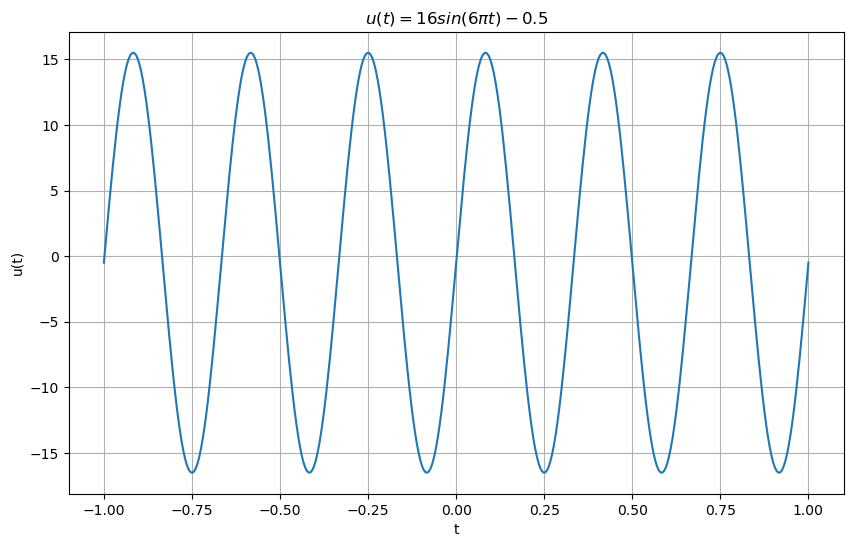

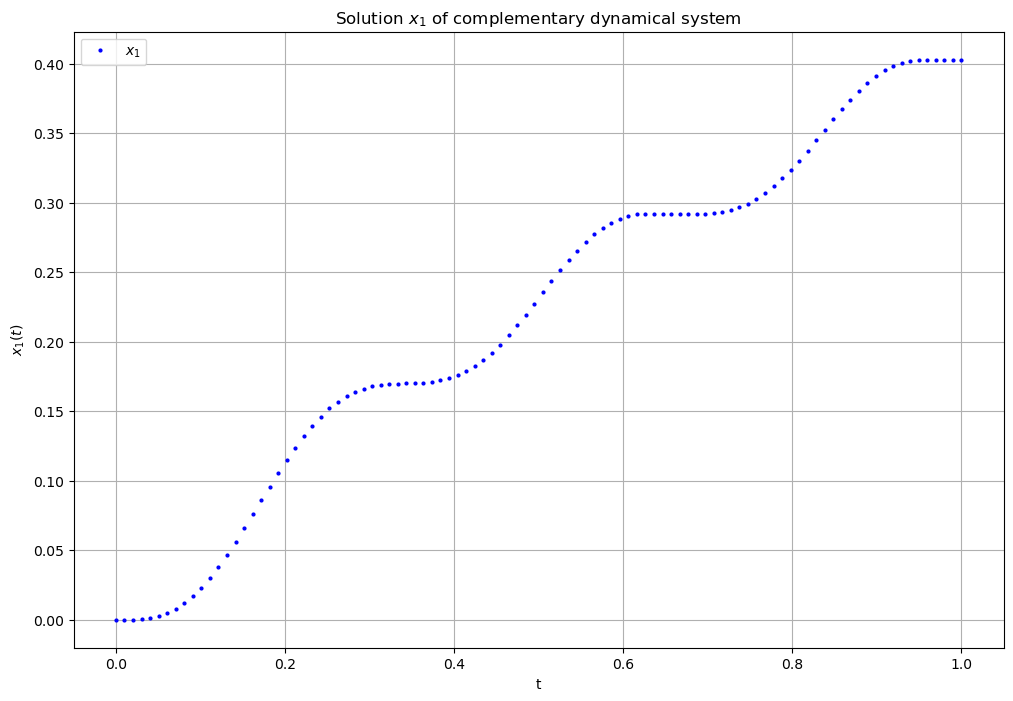

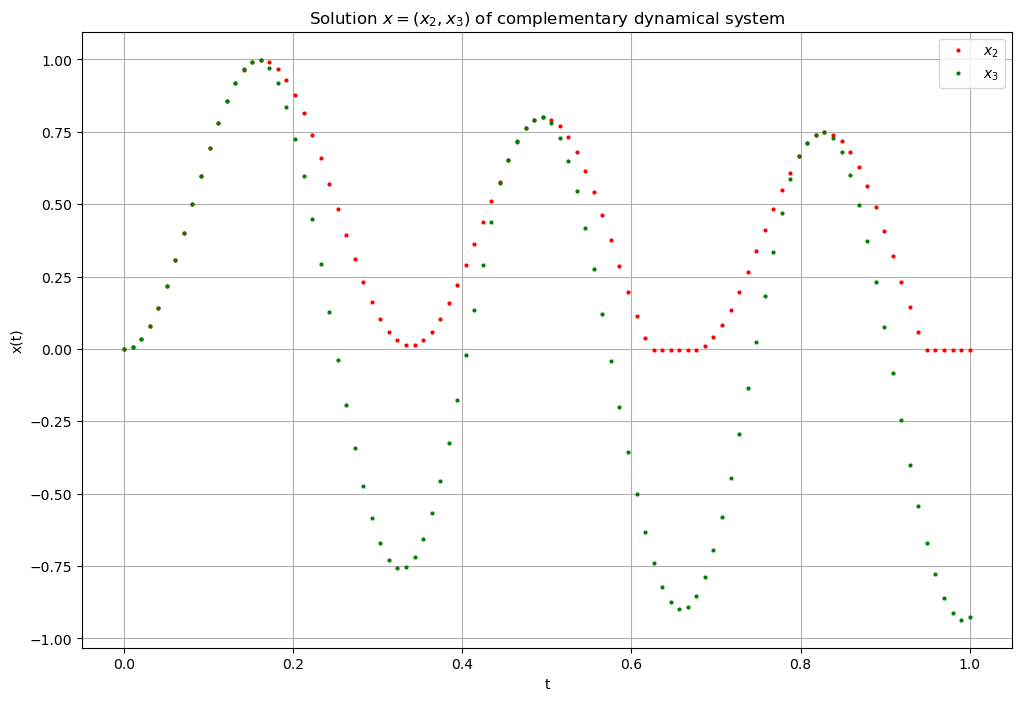

In [27]:
### ------------------------Data settings------------------------###
[R_1, R_2, R_3] = [1,2,1] # Resistor
[L_2, L_3] = [1,2] # Coil
C_4 = 1 # Capacitor

# Time settings
T = 1 # Final time of simulation
n = 100 # Discretization of time

A = np.array([[0.0, 1.0, 0.0],
             [-(1/(L_3*C_4)), -(R_1 + R_3)/L_3, R_1/L_3],
             [0.0, R_1/L_2, -(R_1 + R_2)/L_2]])

B = np.array([[0.0,0.0],
             [1/L_3, 1/L_3],
             [-1/L_2, 0.0]])

C = np.array([[0.0, 1.0, -1.0],
             [0.0, 1.0, 0.0]])

E = np.array([0.0, 1/L_3, 1/L_2])

P = np.array([[1.0, 0.0, 0.0],
             [0.0, L_3, 0],
             [0.0, 0.0, L_2]])

R = np.array([[1, 0.0, 0.0],
             [0.0, np.sqrt(L_3), 0.0],
             [0.0, 0.0, np.sqrt(L_2)]])

F = np.array([0.0, 0.0])

G = np.array([0.0, 0.0])

# For n in N compute epsilon_n, eta_n 
eps = (1/n)**2.1

eta = (1/n)**1.05

# Compute $L$ the Lipschitz constant of the gradient of the objective function given by $L = 2 \lambda_{\max}(CB)$
L = 2*np.max(np.linalg.eigvals(C @ B))

# Test u(t)
def u(t):
    return 16*np.sin(6 * np.pi * t) - 0.5

# Plotting u(t)
t = np.linspace(-1, 1, 400)
u_values = u(t)
plt.figure(figsize=(10, 6))
plt.plot(t, u_values)
plt.title(r'$u(t) = 16sin(6\pi t) - 0.5$')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid(True)
plt.show()

# Initial condition, must be feasible.
x_0 = np.array([0.0,0.0,0.0])
x_solution = solver_Catching_Up_Approx_Proj(x_0, B, C, R, G, F, P, L, u, eps, eta, T, n)

# Split into components
time = np.linspace(0, T, n)
x1 = x_solution[:, 0]
x2 = x_solution[:, 1]
x3 = x_solution[:, 2]
# Plots folder
output_folder = 'plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Plotting x1 separately
plt.figure(figsize=(12, 8))
plt.plot(time, x1, 'o', label='$x_1$', color='blue', markersize=2)
plt.title('Solution $x_1$ of complementary dynamical system')
plt.xlabel('t')
plt.ylabel('$x_1(t)$')
plt.legend()
plt.grid()

# Save file for x1
output_path_x1 = os.path.join(output_folder, 'solucion_x1.png')
plt.savefig(output_path_x1)
plt.show()

# Plotting x2 and x3 separately
plt.figure(figsize=(12, 8))
plt.plot(time, x2, 'o', label='$x_2$', color='red', markersize=2)
plt.plot(time, x3, 'o', label='$x_3$', color='green', markersize=2)
plt.title('Solution $x = (x_2, x_3)$ of complementary dynamical system')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()

# Save file for x2 and x3
output_path_x2_x3 = os.path.join(output_folder, 'soluciones_x2_x3.png')
plt.savefig(output_path_x2_x3)
plt.show()

### Case $G \neq 0$ and $u(t)$ discontinuos

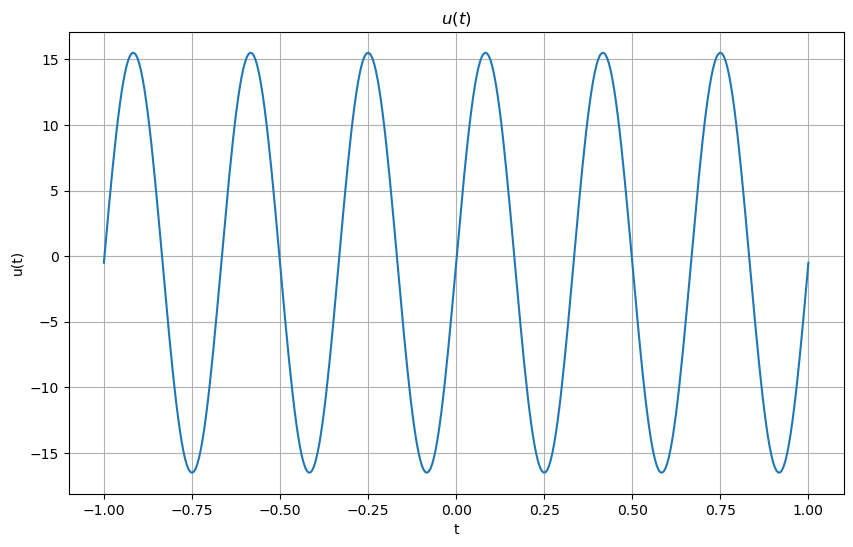

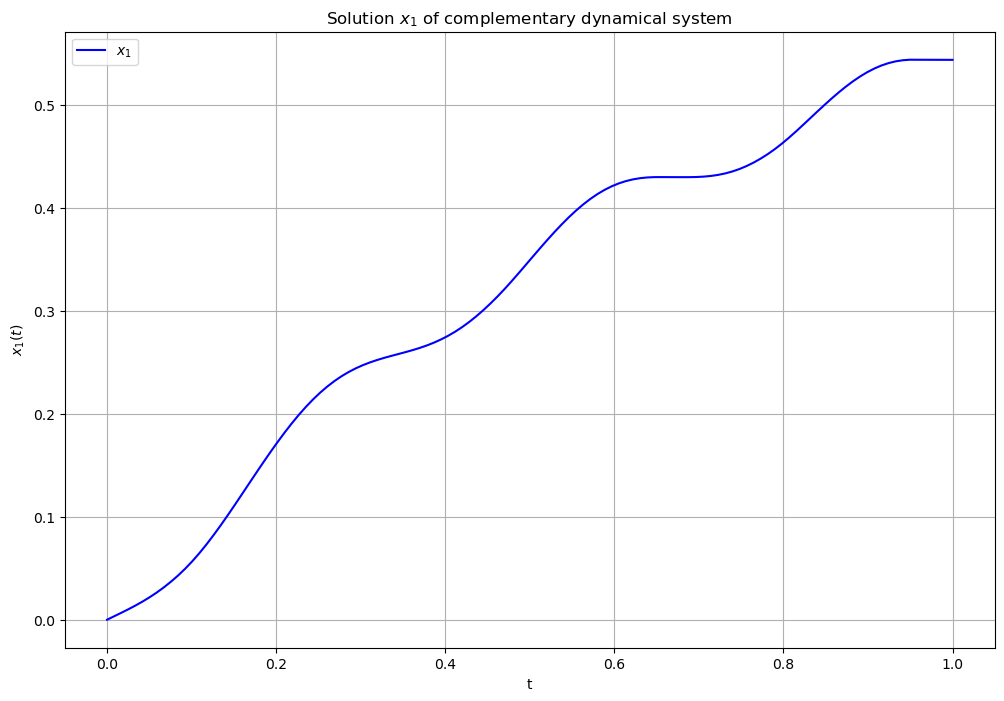

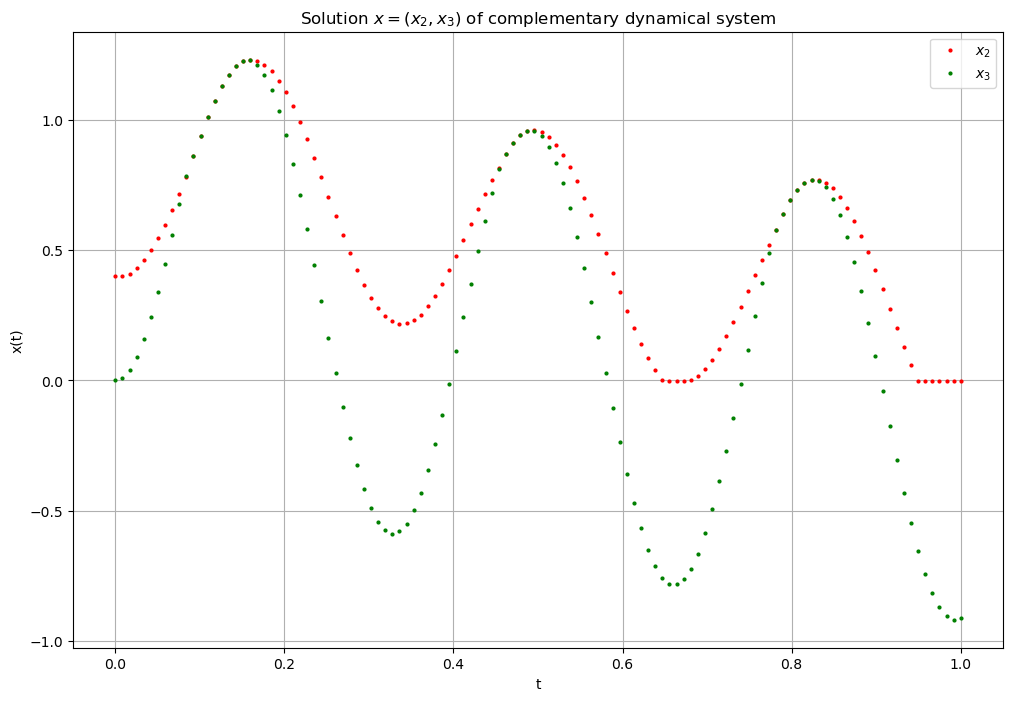

[-0.4 -0.4]


In [29]:
### ------------------------Data settings------------------------###
### Case G not zero and u(t) discontinuos
[R_1, R_2, R_3] = [1,2,1] # Resistor
[L_2, L_3] = [1,2] # Coil
C_4 = 1 # Capacitor

# Time settings
T = 1 # Final time of simulation
n = 120 # Discretization of time

A = np.array([[0.0, 1.0, 0.0],
             [-(1/(L_3*C_4)), -(R_1 + R_3)/L_3, R_1/L_3],
             [0.0, R_1/L_2, -(R_1 + R_2)/L_2]])

B = np.array([[0.0,0.0],
             [1/L_3, 1/L_3],
             [-1/L_2, 0.0]])

C = np.array([[0.0, 1.0, -1.0],
             [0.0, 1.0, 0.0]])

E = np.array([0.0, 1/L_3, 1/L_2])

P = np.array([[1.0, 0.0, 0.0],
             [0.0, L_3, 0],
             [0.0, 0.0, L_2]])

R = np.array([[1, 0.0, 0.0],
             [0.0, np.sqrt(L_3), 0.0],
             [0.0, 0.0, np.sqrt(L_2)]])

F = np.array([0.0, 0.0])

G = np.array([0.0, 0.0])

# For n in N compute epsilon_n, eta_n 
eps = (1/n)**2.1

eta = (1/n)**1.05

# Compute $L$ the Lipschitz constant of the gradient of the objective function given by $L = 2 \lambda_{\max}(CB)$
L = 2*np.max(np.linalg.eigvals(C @ B))

# Test u(t)
#def u(t):
#    return np.sign(np.sin(4 * np.pi * t))

# Plotting u(t)
t = np.linspace(-1, 1, 400)
u_values = u(t)
plt.figure(figsize=(10, 6))
plt.plot(t, u_values)
plt.title(r'$u(t)$')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid(True)
plt.show()

# Initial condition, must be feasible.
x_0 = np.array([0.0,0.4,0.0])
x_solution = solver_Catching_Up_Approx_Proj(x_0, B, C, R, G, F, P, L, u, eps, eta, T, n)

# Split into components
time = np.linspace(0, T, n)
x1 = x_solution[:, 0]
x2 = x_solution[:, 1]
x3 = x_solution[:, 2]
# Plots folder
output_folder = 'plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Plotting x1 separately
plt.figure(figsize=(12, 8))
plt.plot(time, x1, '-', label='$x_1$', color='blue', markersize=2)
plt.title('Solution $x_1$ of complementary dynamical system')
plt.xlabel('t')
plt.ylabel('$x_1(t)$')
plt.legend()
plt.grid()

# Save file for x1
output_path_x1 = os.path.join(output_folder, 'solucion_x1.png')
plt.savefig(output_path_x1)
plt.show()

# Plotting x2 and x3 separately
plt.figure(figsize=(12, 8))
plt.plot(time, x2, 'o', label='$x_2$', color='red', markersize=2)
plt.plot(time, x3, 'o', label='$x_3$', color='green', markersize=2)
plt.title('Solution $x = (x_2, x_3)$ of complementary dynamical system')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()

# Save file for x2 and x3
output_path_x2_x3 = os.path.join(output_folder, 'soluciones_x2_x3.png')
plt.savefig(output_path_x2_x3)
plt.show()
print(-C @ x_0 - G * u(0))

In [30]:
# Soluciones como pares (t,x1), (t,x2), (t,x_3)
time_x1_pairs = list(zip(time, x1))
time_x1_pairs_amplificado = list(zip(5*time, 5*x1))
time_x2_pairs = list(zip(time, x1))
time_x2_pairs_amplificado = list(zip(5*time, 5*x2))
time_x3_pairs = list(zip(time, x1))
time_x3_pairs_amplificado = list(zip(5*time, 5*x3))

In [31]:
# Eliminar las comas entre los pares ordenados y formatear los datos
output_x1 = ' '.join([f"({x[0]}, {x[1]})" for x in time_x1_pairs_amplificado])
print(output_x1)

(0.0, 0.0) (0.04201680672268907, 0.016806722689075633) (0.08403361344537814, 0.03360718694074261) (0.12605042016806722, 0.0508434802268171) (0.1680672268907563, 0.06894100759260065) (0.21008403361344535, 0.08829777687897196) (0.25210084033613445, 0.10927437250447006) (0.29411764705882354, 0.13218486877565883) (0.3361344537815126, 0.15728891017193855) (0.37815126050420167, 0.18478515683399158) (0.4201680672268907, 0.2148062593047587) (0.4621848739495798, 0.24769569343872705) (0.5042016806722689, 0.28393495306232713) (0.546218487394958, 0.32339077884534023) (0.5882352941176471, 0.3658424150146669) (0.6302521008403361, 0.4109844649353777) (0.6722689075630252, 0.45842826349827215) (0.7142857142857142, 0.5077318739598508) (0.7563025210084033, 0.5583899746533553) (0.7983193277310924, 0.6098538374714548) (0.8403361344537814, 0.6615850217313746) (0.8823529411764706, 0.7131374521502862) (0.9243697478991596, 0.7640613390384593) (0.9663865546218486, 0.8139144474248293) (1.0084033613445378, 0.8622

In [32]:
# Eliminar las comas entre los pares ordenados y formatear los datos
output_x2 = ' '.join([f"({x[0]}, {x[1]})" for x in time_x2_pairs_amplificado])
print(output_x2)

(0.0, 2.0) (0.04201680672268907, 1.9992552459483712) (0.08403361344537814, 2.0511189010428637) (0.12605042016806722, 2.153605756528242) (0.1680672268907563, 2.303455545078188) (0.21008403361344535, 2.4962148794342705) (0.25210084033613445, 2.7263490562714643) (0.29411764705882354, 2.9873809261572895) (0.3361344537815126, 3.2720533527843108) (0.37815126050420167, 3.5725111940212884) (0.4201680672268907, 3.9138426619422377) (0.4621848739495798, 4.312471895208402) (0.5042016806722689, 4.695243268178561) (0.546218487394958, 5.0517447041498755) (0.5882352941176471, 5.371903940564584) (0.6302521008403361, 5.645812028984437) (0.6722689075630252, 5.867129644927856) (0.7142857142857142, 6.028313982527038) (0.7563025210084033, 6.124199675353853) (0.7983193277310924, 6.156010926930451) (0.8403361344537814, 6.134739219850479) (0.8823529411764706, 6.0599425396925986) (0.9243697478991596, 5.932519897978036) (0.9663865546218486, 5.754688910101541) (1.0084033613445378, 5.529930355770776) (1.0504201680

In [33]:
# Eliminar las comas entre los pares ordenados y formatear los datos
output_x3 = ' '.join([f"({x[0]}, {x[1]})" for x in time_x3_pairs_amplificado])
print(output_x3)

(0.0, 0.0) (0.04201680672268907, 0.048930659963969114) (0.08403361344537814, 0.20155586780571277) (0.12605042016806722, 0.45174588481719596) (0.1680672268907563, 0.7909805645266909) (0.21008403361344535, 1.2085612952953295) (0.25210084033613445, 1.6918775248856879) (0.29411764705882354, 2.226721192739491) (0.3361344537815126, 2.7976411962144554) (0.37815126050420167, 3.3883290146856124) (0.4201680672268907, 3.915337008496455) (0.4621848739495798, 4.31296628501652) (0.5042016806722689, 4.69571099812833) (0.546218487394958, 5.052173300124786) (0.5882352941176471, 5.372280223090846) (0.6302521008403361, 5.648384788454498) (0.6722689075630252, 5.869121934321627) (0.7142857142857142, 6.02961760674261) (0.7563025210084033, 6.124762016994778) (0.7983193277310924, 6.141594107818023) (0.8403361344537814, 6.052928930523549) (0.8823529411764706, 5.860092603478282) (0.9243697478991596, 5.567033829774494) (0.9663865546218486, 5.180224675146501) (1.0084033613445378, 4.708498175536597) (1.05042016806

### Animation: Evolution of the Solution of the Complementary Dynamic System with Different Discretizations

Procesando: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:01<00:00, 76.78frame/s]


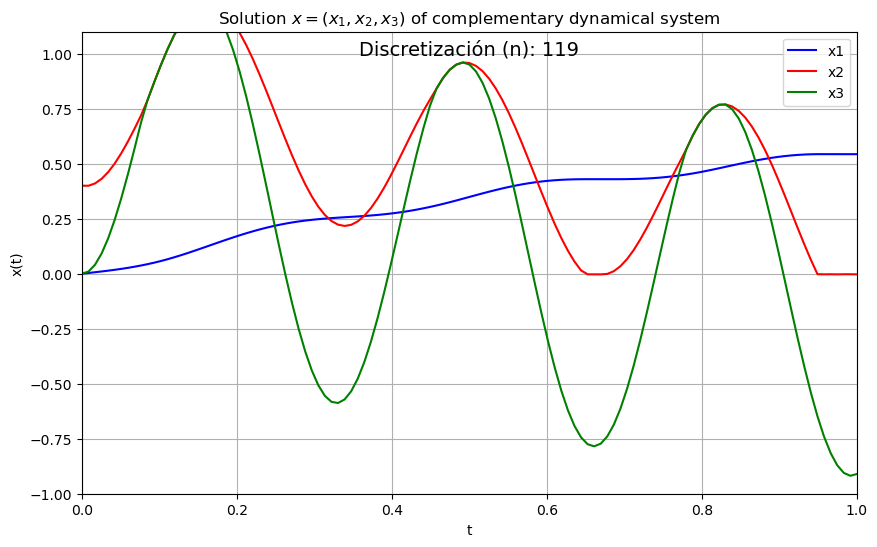

In [35]:
# Define el rango de n
n_values = list(range(2, 120, 1))

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))
# Crea las líneas con colores específicos
colors = ['blue', 'red', 'green']  # Especifica los colores para x1, x2, x3
lines = [ax.plot([], [], '-', label=f'x{i+1}', color=colors[i])[0] for i in range(3)]
ax.set_xlim(0, T)
ax.set_ylim(-1, 1.1)  # Ajusta los límites según lo que necesites
ax.set_title('Solution $x = (x_1, x_2, x_3)$ of complementary dynamical system')
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.legend()
ax.grid()

# Crea un texto vacío para el valor de n
text_n = ax.text(0.5, 0.95, '', transform=ax.transAxes, ha='center', fontsize=14, color='black')

# Función de inicialización
def init():
    for line in lines:
        line.set_data([], [])
    text_n.set_text('')  # Limpia el texto inicial
    return lines + [text_n]

# Función de actualización
def update(frame):
    n = n_values[frame]
    # Cálculo de epsilon y eta
    eps = (1/n)**2.1
    eta = (1/n)**1.05
    # Resolver el problema
    x_solution = solver_Catching_Up_Approx_Proj(x_0, B, C, R, G, F, P, L, u, eps, eta, T, n)
    
    # Actualiza los datos de cada línea
    time = np.linspace(0, T, n)
    for i, line in enumerate(lines):
        line.set_data(time, x_solution[:, i])
    
    # Actualiza el texto con el valor de n
    text_n.set_text(f'Discretización (n): {n}')
    return lines + [text_n]

# Crea la animación con una barra de progreso
with tqdm(total=len(n_values), desc='Procesando', unit='frame') as pbar:
    ani = FuncAnimation(fig, update, frames=len(n_values), init_func=init, blit=False, repeat=False)
    for frame in range(len(n_values)):
        update(frame)
        pbar.update(1)
        
# Guarda la animación
output_path = 'animacion_soluciones.gif'
ani.save(output_path, writer='pillow', fps=10)  # Usamos Pillow para guardar

# Muestra la animación
plt.show()